In [595]:
# Import
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split
import os,datetime
import IPython
import IPython.display
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [596]:
# Data Loading

csv_path= 'Dataset/cases_malaysia.csv'

print(csv_path)

Dataset/cases_malaysia.csv


In [597]:
# Put into a dataframe

df = pd.read_csv(csv_path,index_col='date',parse_dates=['date'])  # put the csv into dataframe
print(df.head(5))            # checking the first 5 row 

            cases_new  cases_import  cases_recovered  cases_active  \
date                                                                 
2020-01-25          4             4                0             4   
2020-01-26          0             0                0             4   
2020-01-27          0             0                0             4   
2020-01-28          0             0                0             4   
2020-01-29          3             3                0             7   

            cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  \
date                                                                          
2020-01-25              0            4           0           0            0   
2020-01-26              0            0           0           0            0   
2020-01-27              0            0           0           0            0   
2020-01-28              0            0           0           0            0   
2020-01-29              0          

In [598]:
# Checking the dataset info

print(df.info()) # it appear that there are null values in columns cluster_import,cluster_religious, cluster_community, ncluster_highRisk, cluster_education, cluster_detentionCentre, cluster_workplace    


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1744 entries, 2020-01-25 to 2024-11-02
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                1744 non-null   int64  
 1   cases_import             1744 non-null   int64  
 2   cases_recovered          1744 non-null   int64  
 3   cases_active             1744 non-null   int64  
 4   cases_cluster            1744 non-null   int64  
 5   cases_unvax              1744 non-null   int64  
 6   cases_pvax               1744 non-null   int64  
 7   cases_fvax               1744 non-null   int64  
 8   cases_boost              1744 non-null   int64  
 9   cases_child              1744 non-null   int64  
 10  cases_adolescent         1744 non-null   int64  
 11  cases_adult              1744 non-null   int64  
 12  cases_elderly            1744 non-null   int64  
 13  cases_0_4                1744 non-null   int64  
 14  cases_

In [599]:
print(df.columns)

Index(['cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_cluster', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_child', 'cases_adolescent', 'cases_adult',
       'cases_elderly', 'cases_0_4', 'cases_5_11', 'cases_12_17',
       'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
       'cases_60_69', 'cases_70_79', 'cases_80', 'cluster_import',
       'cluster_religious', 'cluster_community', 'cluster_highRisk',
       'cluster_education', 'cluster_detentionCentre', 'cluster_workplace'],
      dtype='object')


In [600]:
# Checking if there are null values

df.isna().sum().sort_values(ascending = False)

cluster_workplace          570
cluster_detentionCentre    570
cluster_education          570
cluster_highRisk           570
cluster_community          570
cluster_religious          570
cluster_import             570
cases_import                 0
cases_80                     0
cases_70_79                  0
cases_60_69                  0
cases_50_59                  0
cases_40_49                  0
cases_30_39                  0
cases_18_29                  0
cases_new                    0
cases_5_11                   0
cases_0_4                    0
cases_elderly                0
cases_adult                  0
cases_adolescent             0
cases_child                  0
cases_boost                  0
cases_fvax                   0
cases_pvax                   0
cases_unvax                  0
cases_cluster                0
cases_active                 0
cases_recovered              0
cases_12_17                  0
dtype: int64

In [601]:
# # Fill the null value with Imputer

# columns_name = df.columns
# knn = KNNImputer()
# ii = IterativeImputer()
# df = ii.fit_transform(df) # this function return as numpy array
# df = pd.DataFrame(df) # to convert numpy array to pandas dataframe back
# df.columns = columns_name

In [602]:
# Fill the null value using FILLNA()

columns_cluster = ['cluster_import',
       'cluster_religious', 'cluster_community', 'cluster_highRisk',
       'cluster_education', 'cluster_detentionCentre', 'cluster_workplace']

for x in columns_cluster:
    df[x] = df[x].fillna(0)

In [603]:
# Checking if there are anymore null values

df.isna().sum().sort_values(ascending = False)

cases_new                  0
cases_import               0
cluster_detentionCentre    0
cluster_education          0
cluster_highRisk           0
cluster_community          0
cluster_religious          0
cluster_import             0
cases_80                   0
cases_70_79                0
cases_60_69                0
cases_50_59                0
cases_40_49                0
cases_30_39                0
cases_18_29                0
cases_12_17                0
cases_5_11                 0
cases_0_4                  0
cases_elderly              0
cases_adult                0
cases_adolescent           0
cases_child                0
cases_boost                0
cases_fvax                 0
cases_pvax                 0
cases_unvax                0
cases_cluster              0
cases_active               0
cases_recovered            0
cluster_workplace          0
dtype: int64

In [604]:
# Checking if there is any duplicated data

df.duplicated().sum() 

10

In [ ]:
# Check back the df info after cleaning

print(df.info)

<bound method DataFrame.info of             cases_new  cases_import  cases_recovered  cases_active  \
date                                                                 
2020-01-25          4             4                0             4   
2020-01-26          0             0                0             4   
2020-01-27          0             0                0             4   
2020-01-28          0             0                0             4   
2020-01-29          3             3                0             7   
...               ...           ...              ...           ...   
2024-10-29        146             0              150          8708   
2024-10-30        157             1              168          8697   
2024-10-31        102             1              149          8650   
2024-11-01        112             0              150          8612   
2024-11-02         86             1              106          8592   

            cases_cluster  cases_unvax  cases_pvax  cases

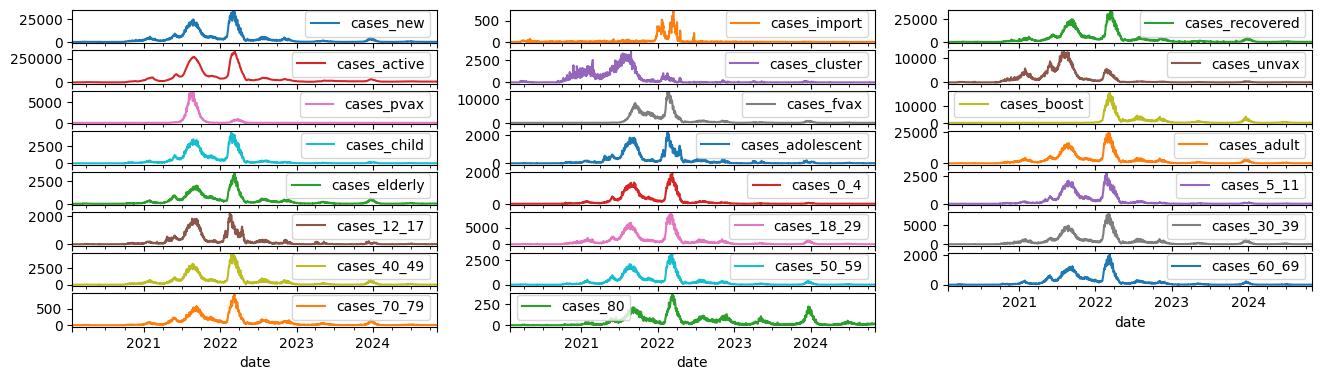

In [606]:
# Explore and inspect data

plot_cols = df.drop(labels=columns_cluster, axis=1).columns
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True ,layout = (23,3), figsize = (16, 12))

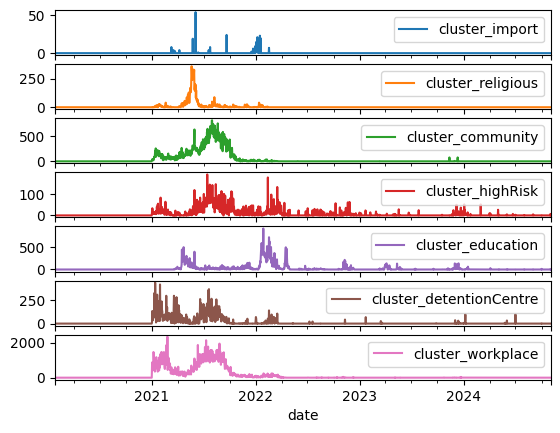

In [607]:
# Explore and inspect data part 2 electric boogaloo

plot_cols = columns_cluster
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

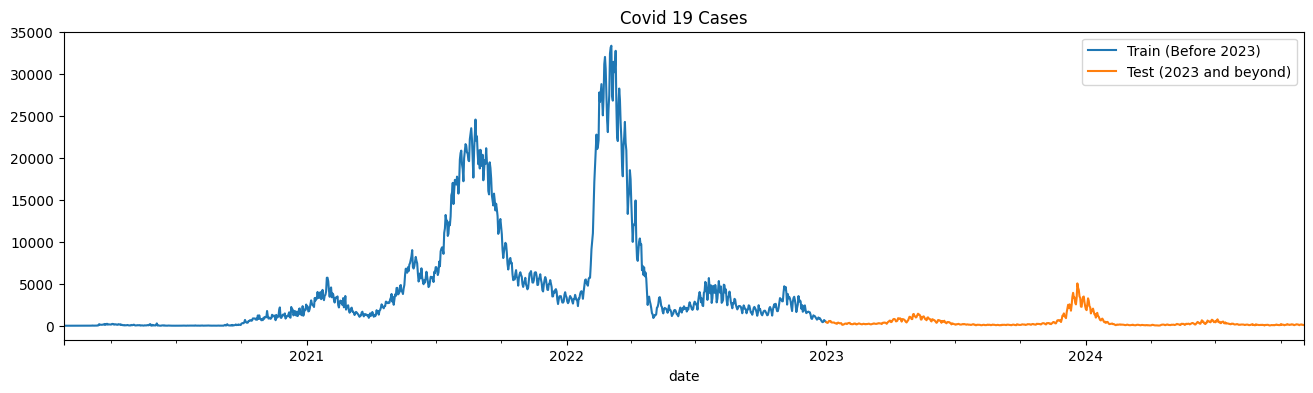

In [608]:
# Setting the train and test plot

tstart = 2020
tend = 2022

def train_test_plot(df,tstart,tend):
    df.loc[f'{tstart}':f'{tend}','cases_new'].plot(figsize=(16,4),label=f"Train (Before {tend+1})")
    df.loc[f'{tend+1}':, 'cases_new'].plot(figsize=(16,4),label=f"Test ({tend+1} and beyond)")
    plt.legend()
    plt.title('Covid 19 Cases')
    plt.show()

train_test_plot(df,tstart,tend)

In [609]:
# Splitititing the training set into X and y
def train_test_split(dataset,tstart,tend):
    train = df.loc[f"{tstart}":f"{tend}","cases_new"].values
    test = df.loc[f"{tend+1}":,"cases_new"].values
    return train,test

training_set,test_set = train_test_split(df,tstart,tend)

print(len(test_set))
print(len(training_set))

672
1072


In [610]:
# Normalization Wolololo

mms = MinMaxScaler(feature_range=(0,1))

training_set = training_set.reshape(-1,1)

training_set_scaled = mms.fit_transform(training_set)

print(training_set_scaled[:5])

[[1.19738969e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [8.98042268e-05]]


In [611]:
# Creating the data prediction based on previous 30 data

def split_sequence(sequence,n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x,seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

n_steps = 30
features = 1

# split into samples

X_train,y_train = split_sequence(training_set_scaled,n_steps)

In [612]:
# Reshape X_train for model

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

print(X_train.shape)

(1042, 30, 1)


In [613]:
# The LSTM Architecture
# Model Definition
model_lstm = keras.Sequential()


# Neural network construction
model_lstm.add(keras.layers.LSTM(units=64,activation='tanh',input_shape=(n_steps,features),return_sequences=True)) # LSTM Input Layer



model_lstm.add(keras.layers.LSTM(units=64)) # LSTM layer

model_lstm.add(keras.layers.Dropout(0.0001)) # Dropout Layer

model_lstm.add(keras.layers.Dense(units=1)) # Output layer


c:\Users\suhaimi\AppData\Local\anaconda3\envs\tensorflow_cpu\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [614]:
# Compiling the model
model_lstm.compile(optimizer='adam',loss='mse', metrics=['mae'])

print(model_lstm.summary())

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_67 (LSTM)                  │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_68 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [615]:
# Early Stopping Function

es = keras.callbacks.EarlyStopping(patience=3, verbose=2)

In [616]:
# Define the tensorboard function

logpath = "TensorBoard/Covid_Prediction_v1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = keras.callbacks.TensorBoard(logpath)

In [617]:
# Model Training Arc

model_lstm.fit(X_train,
               y_train,
               epochs = 200,
               batch_size=32,
               callbacks = [es,tb]
               )

Epoch 1/200


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0193 - mae: 0.0838
Epoch 2/200
13/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - mae: 0.0260

c:\Users\suhaimi\AppData\Local\anaconda3\envs\tensorflow_cpu\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - mae: 0.0270
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0018 - mae: 0.0227
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0018 - mae: 0.0231
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - mae: 0.0217
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - mae: 0.0213
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - mae: 0.0201
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - mae: 0.0202
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0018 - mae: 0.0250
Epoch 10/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - mae: 0.0230
Epoch 11/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - mae: 0.0202
Epoch 12/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - mae: 0.0211
Epoch 13/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - mae: 0.0196
Epoch 14/200
33/33 ━━━━━━━━━━━━━━━━━

In [618]:
# Creating Testing dataset

dataset_total = df.loc[:,'cases_new']
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1,1)

# scaling
inputs = mms.transform(inputs)

# Split into samples
X_test,y_test = split_sequence(inputs,n_steps)

# reshape
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],features)

# predictions
predicted_covid_cases = model_lstm.predict(X_test)

# inverse transform the values - undo the normalization of covid cases (undo any sklearn's transform)
predicted_covid_cases = mms.inverse_transform(predicted_covid_cases)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [619]:
def plot_predictions(test,predicted):
    plt.plot(test,color='gray',label='Real')
    plt.plot(predicted,color='red',label='Predicted')
    plt.title('Covid Cases Prediction')
    plt.xlabel('Time')
    plt.ylabel('New Cases')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = np.sqrt(mean_squared_error(test,predicted))
    print('The root mean square error is {:.2f}.'.format(rmse))

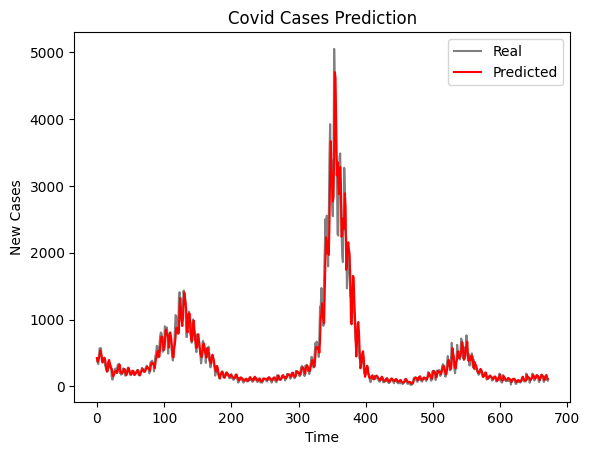

In [ ]:
# Comparision between test set and predictions UwU

plot_predictions(test_set,predicted_covid_cases)

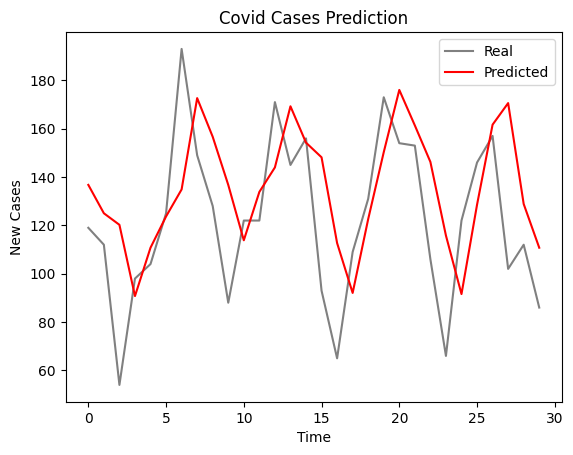

In [ ]:
# Prediction for the last 30 days

plot_predictions(test_set[-30:],predicted_covid_cases[-30:])

In [621]:
# Evaluation of Model

evaluation = model_lstm.evaluate(X_test, y_test)

print(evaluation)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6252e-05 - mae: 0.0020 
[2.0466130081331357e-05, 0.002141497330740094]


In [622]:
# MAE extraction from model evaluation
mae = evaluation[1]
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.002141497330740094


𝑀𝑒𝑎𝑛 𝐴𝑏𝑠𝑜𝑙𝑢𝑡𝑒 𝑃𝑒𝑟𝑐𝑒𝑛𝑡𝑎𝑔𝑒 𝐸𝑟𝑟𝑜𝑟 = 𝑀𝑒𝑎𝑛 𝐴𝑏𝑠𝑜𝑙𝑢𝑡𝑒 𝐸𝑟𝑟𝑜𝑟 / 𝑠𝑢𝑚(𝑎𝑏𝑠(𝑦_𝑎𝑐𝑡𝑢𝑎𝑙)) ∗ 100%

In [623]:
# Mean Absolute Percentage Error formula 

mape = (mae/sum(abs(y_test))) * 100

print(mape)

[0.02445556]


In [624]:
# RMSE

print(return_rmse(test_set,predicted_covid_cases))

The root mean square error is 151.13.
None
